In [12]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Removing headers and footers to make the classification more focused on the content
# Also helps in meta-data leakage, e.g. author name can hint a category
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [16]:
# Extract data and labels
train_data = newsgroups_train.data
train_labels = newsgroups_train.target

test_data = newsgroups_test.data
test_labels = newsgroups_test.target

print(f"Number of training docs: {len(train_data)}")
print(f"Number of test docs: {len(test_data)}")
print(f"Number of classes: {len(newsgroups_train.target_names)}")

lengths_training = [len(doc.split()) for doc in train_data]
print(f"Avg words per doc in training data: {sum(lengths_training)/len(lengths_training):.2f}")
lengths_test = [len(doc.split()) for doc in test_data]
print(f"Avg words per doc in test data: {sum(lengths_test)/len(lengths_test):.2f}")

Number of training docs: 11314
Number of test docs: 7532
Number of classes: 20
Avg words per doc in training data: 185.83
Avg words per doc in test data: 175.34


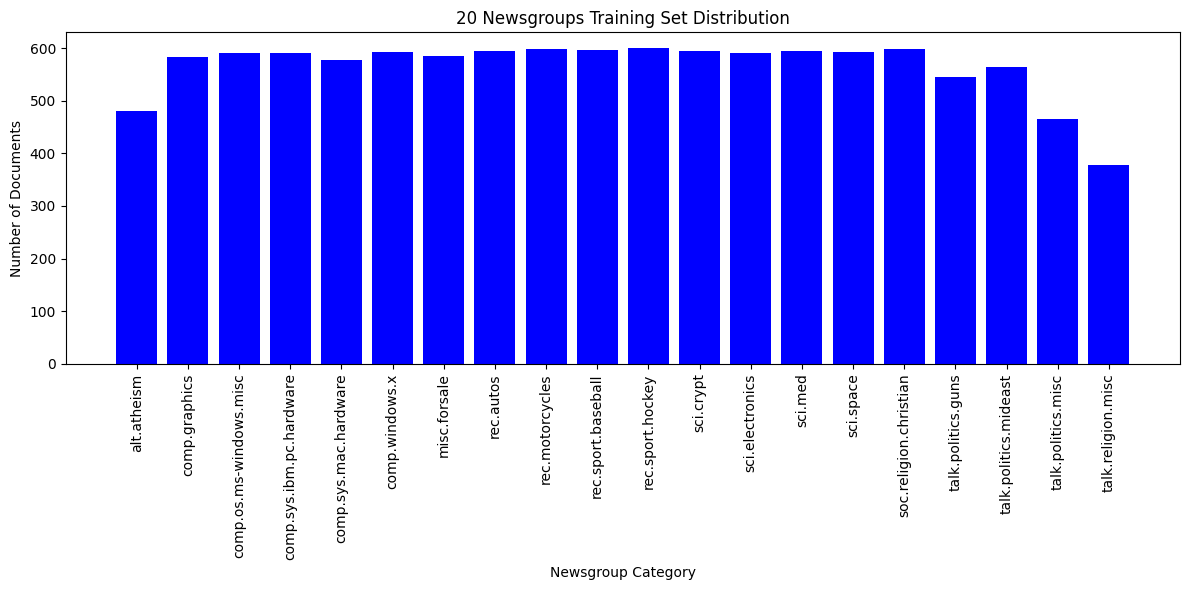

In [18]:
# Class label Distribution of Training set
unique, counts = np.unique(newsgroups_train.target, return_counts=True)
class_names = newsgroups_train.target_names
plt.figure(figsize=(12, 6))
plt.bar(class_names, counts, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Newsgroup Category')
plt.ylabel('Number of Documents')
plt.title('20 Newsgroups Training Set Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df: Only include words that appear in at least 2 docs.
# max_df: Ignore words that appear in more than 80% of docs.
# sublinear_tf: Apply logarithmic scaling to term frequency. More robust to word repetitions in a document.

tfidf_vectorizer = TfidfVectorizer(max_features=5000, sublinear_tf=True, min_df=2, max_df=0.8, ngram_range=(1,2), stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data)
X_test_tfidf = tfidf_vectorizer.transform(test_data)

KeyboardInterrupt: 